In [6]:
%matplotlib inline 

In [62]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [38]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784) / 255
X_test = X_test.reshape(10000, 784) / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [41]:
print(X_train)
print(y_train)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]


In [45]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

rms = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])

In [52]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
hist = model.fit(X_train, y_train, batch_size=200, verbose=1, nb_epoch=100, validation_split=0.1, callbacks=[early_stopping])

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 5s - loss: 0.0212 - acc: 0.9932 - val_loss: 0.0668 - val_acc: 0.9832
Epoch 2/100
54000/54000 [==============================] - 5s - loss: 0.0180 - acc: 0.9944 - val_loss: 0.0657 - val_acc: 0.9838
Epoch 3/100
54000/54000 [==============================] - 5s - loss: 0.0162 - acc: 0.9950 - val_loss: 0.0671 - val_acc: 0.9863
Epoch 4/100
54000/54000 [==============================] - 5s - loss: 0.0135 - acc: 0.9959 - val_loss: 0.0660 - val_acc: 0.9843
Epoch 5/100
54000/54000 [==============================] - 6s - loss: 0.0122 - acc: 0.9961 - val_loss: 0.0654 - val_acc: 0.9843
Epoch 6/100
54000/54000 [==============================] - 6s - loss: 0.0109 - acc: 0.9968 - val_loss: 0.0700 - val_acc: 0.9847
Epoch 7/100
54000/54000 [==============================] - 7s - loss: 0.0100 - acc: 0.9969 - val_loss: 0.0662 - val_acc: 0.9843
Epoch 8/100
54000/54000 [==============================

In [53]:
score = model.evaluate(X_test, y_test, verbose=1)

 9952/10000 [============================>.] - ETA: 0s

In [54]:
print('test loss : ', score[0])
print('test accuracy : ', score[1])

test loss :  0.0718522111459
test accuracy :  0.9829


In [60]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
nb_epoch = len(loss)

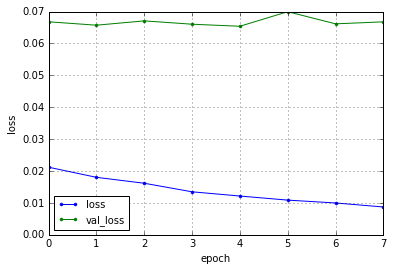

In [69]:
plt.plot(range(nb_epoch), loss, marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()